# EDA for Two cities power consumption before comparing them.

## Table of Contents

In [1]:
# EDA on 2 files before we decide how to model them

# steps of EDA are:
# 1. Load data
# 2. Check for missing values
    # 2.1 OUTPUT: Save Raw data without missing features to 2 csv files
# 3. Check for duplicates
# 4. Check for data types
    # 4.1 Changed DateTime and MTU to datetime format
# 5. Check for outliers
    # 5.1 Check all features and save boxplots
        # 5.1.1 OUTPUT: save all z-scores with their corresponding feature and value to csv in the folder named 'z'
        # 5.1.2 OUTPUT: save all min-max values with their corresponding feature and value to csv in the folder named 'min_max'
    # 5.2 Investigate Fossil gas feature and the number of outliers
        # 5.2.1 OUTPUT: Save the dataset without the outliers to csv
    # 5.3 Created functions to investigate the other features except for the datetime for Dutch dataset
    # 5.4 
# 6. Check for data distribution
# 7. Check for correlation
# 8. Check for data imbalance
# 9. Check for data leakage
# 10. Check for feature importance
# 11. Check for feature engineering
# 12. Check for feature scaling
# 13. Check for feature selection
# 14. Check for model selection
# 15. Check for model evaluation
# 16. Check for model tuning
# 17. Check for model deployment



## Import Modules and Load Data

In [2]:
# 1. Load data

# %pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df1 = pd.read_csv('Data/Dutch-energy.csv')
df2 = pd.read_csv('Data/teteoun_power consumption.csv')


print(df1.head())
print(df2.head())

                   MTU  Biomass  Fossil Brown coal/Lignite  \
0  2022-08-04 00:15:00      0.0                        NaN   
1  2022-08-04 00:30:00      0.0                        NaN   
2  2022-08-04 00:45:00      0.0                        NaN   
3  2022-08-04 01:00:00      0.0                        NaN   
4  2022-08-04 01:15:00      0.0                        NaN   

   Fossil Coal-derived gas  Fossil Gas  Fossil Hard coal  Fossil Oil  \
0                      NaN      5613.0            2747.0         NaN   
1                      NaN      5425.0            2742.0         NaN   
2                      NaN      5039.0            2797.0         NaN   
3                      NaN      4661.0            2805.0         NaN   
4                      NaN      3833.0            2789.0         NaN   

   Fossil Oil shale  Fossil Peat  Geothermal  ...  \
0               NaN          NaN         NaN  ...   
1               NaN          NaN         NaN  ...   
2               NaN          NaN   

## Check for Missing values and remove features with 100% missing data


In [3]:



# check for missing values as a percentage of the missing data
print(df1.isnull().mean()*100)
print(df2.isnull().mean()*100)



MTU                                  0.000000
Biomass                              0.101971
Fossil Brown coal/Lignite          100.000000
Fossil Coal-derived gas            100.000000
Fossil Gas                           0.099544
Fossil Hard coal                     0.101971
Fossil Oil                         100.000000
Fossil Oil shale                   100.000000
Fossil Peat                        100.000000
Geothermal                         100.000000
Hydro Pumped Storage               100.000000
Hydro Pumped Storage.1             100.000000
Hydro Run-of-river and poundage      0.099544
Hydro Water Reservoir              100.000000
Marine                             100.000000
Nuclear                              0.098330
Other                                0.098330
Other renewable                    100.000000
Solar                                0.100758
Waste                                0.099544
Wind Offshore                        0.098330
Wind Onshore                      

In [4]:
# ductch energy has a few missing values at 100%, we can drop them
# teteoun power consumption has no missing values

df1 = df1.dropna(axis=1, how='all')

print(df1)

# save the raw data without missing values to csv
df1.to_csv('Data/Dutch-energy-clean_RAW.csv', index=False)


# save the raw data without missing values to csv
df2.to_csv('Data/Teteoun-energy-clean_RAW.csv', index=False)


                       MTU  Biomass  Fossil Gas  Fossil Hard coal  \
0      2022-08-04 00:15:00      0.0      5613.0            2747.0   
1      2022-08-04 00:30:00      0.0      5425.0            2742.0   
2      2022-08-04 00:45:00      0.0      5039.0            2797.0   
3      2022-08-04 01:00:00      0.0      4661.0            2805.0   
4      2022-08-04 01:15:00      0.0      3833.0            2789.0   
...                    ...      ...         ...               ...   
82371  2025-01-16 23:00:00      0.0     10028.0            3798.0   
82372  2025-01-16 23:15:00      0.0     10154.0            3788.0   
82373  2025-01-16 23:30:00      0.0     10068.0            3787.0   
82374  2025-01-16 23:45:00      0.0      9958.0            3802.0   
82375  2025-01-16 00:00:00      0.0      9621.0            3797.0   

       Hydro Run-of-river and poundage  Nuclear  Other  Solar  Waste  \
0                                  0.0    466.0   79.0    0.0   70.0   
1                          

## Check for Duplicates

In [5]:
# check for duplicates

print(df1.duplicated().sum())
print(df2.duplicated().sum())



0
0


In [6]:
# there are no duplicates in both datasets



## Checking Types

In [7]:
# 4. Check for data types

print(df1.dtypes)
print(df2.dtypes)


MTU                                 object
Biomass                            float64
Fossil Gas                         float64
Fossil Hard coal                   float64
Hydro Run-of-river and poundage    float64
Nuclear                            float64
Other                              float64
Solar                              float64
Waste                              float64
Wind Offshore                      float64
Wind Onshore                       float64
dtype: object
DateTime                  object
Temperature              float64
Humidity                 float64
Wind Speed               float64
general diffuse flows    float64
diffuse flows            float64
Zone 1                   float64
Zone 2                   float64
Zone 3                   float64
dtype: object


In [8]:
# Change the datetime columns into a datetime format

# convert MTU to datetime from YYYY-mm-dd hh:mm:ss 
df1['MTU'] = pd.to_datetime(df1['MTU'], format='%Y-%m-%d %H:%M:%S')

# convert DateTime to date format in df2 from the format d-m-Y H:M
df2['DateTime'] = pd.to_datetime(df2['DateTime'], format='mixed')



In [9]:
# check types again
print(df1.dtypes)
print(df2.dtypes)


MTU                                datetime64[ns]
Biomass                                   float64
Fossil Gas                                float64
Fossil Hard coal                          float64
Hydro Run-of-river and poundage           float64
Nuclear                                   float64
Other                                     float64
Solar                                     float64
Waste                                     float64
Wind Offshore                             float64
Wind Onshore                              float64
dtype: object
DateTime                 datetime64[ns]
Temperature                     float64
Humidity                        float64
Wind Speed                      float64
general diffuse flows           float64
diffuse flows                   float64
Zone 1                          float64
Zone 2                          float64
Zone 3                          float64
dtype: object


## General Outlier detection

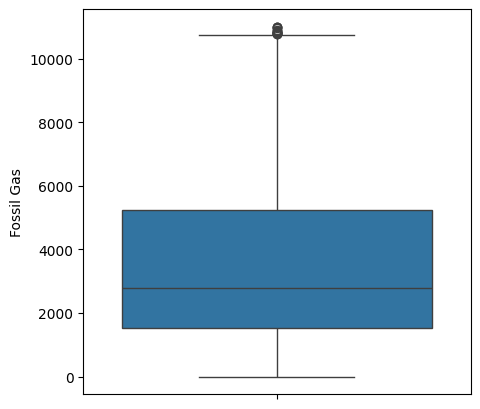

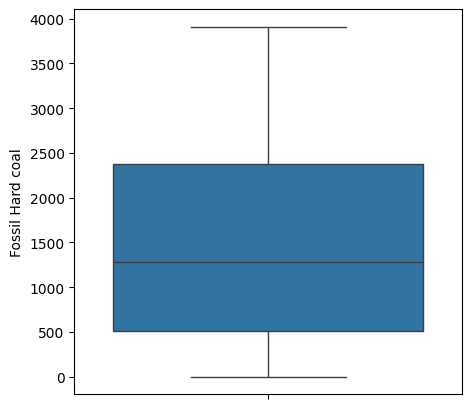

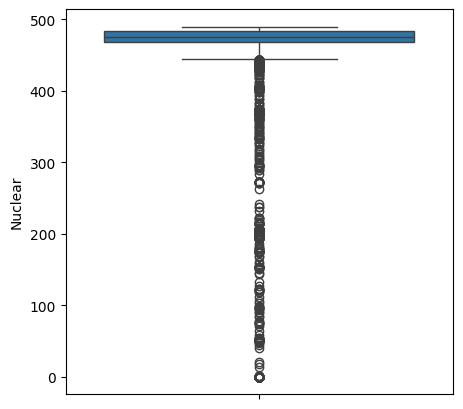

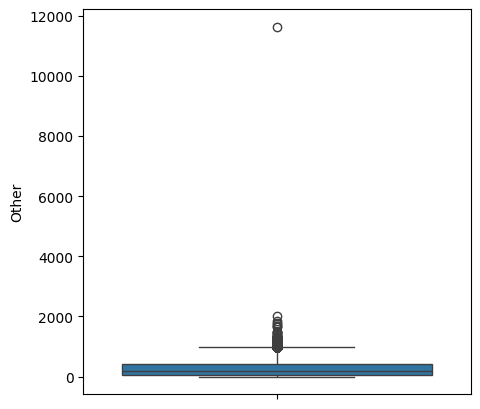

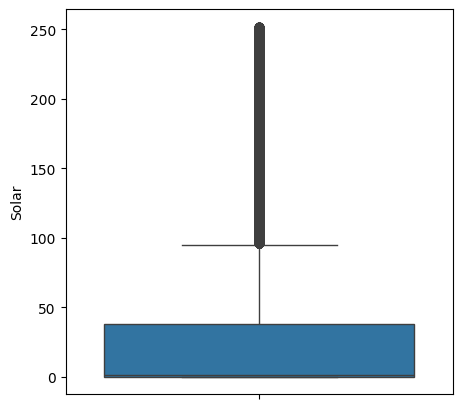

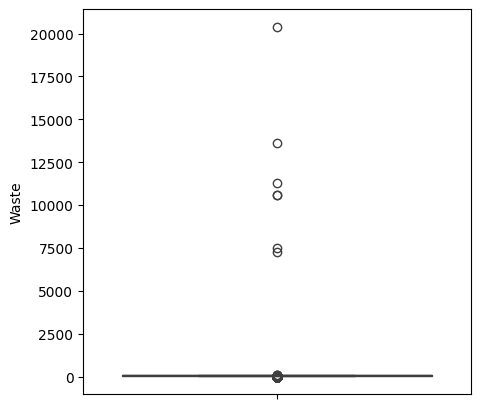

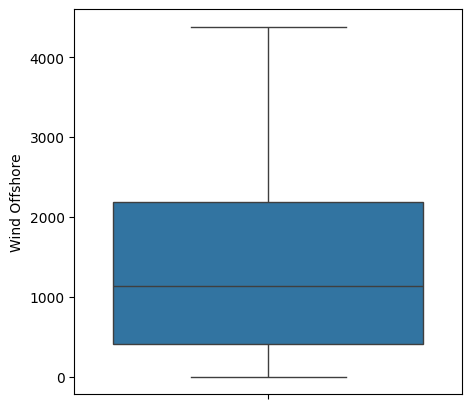

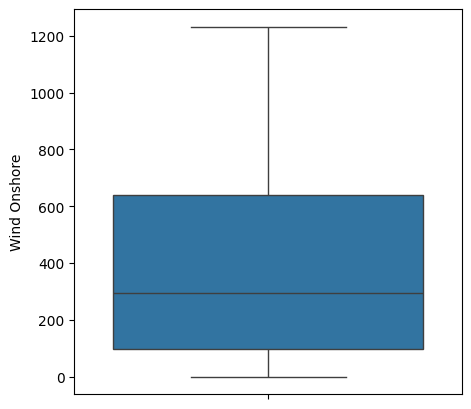

In [10]:

# 5. Check for outliers
# create a individual boxplots for each variable to check for outliers

# create a list of columns without the datetime column
columns = df1.columns.tolist()

# remove the datetime(not a numeric value), Biomass (all null values) and Hydro Run-of-river and 
# poundage (all zero values) columns from the list
columns.remove('MTU')
columns.remove('Biomass')
columns.remove('Hydro Run-of-river and poundage')


def boxplot(data):
    plt.figure(figsize=(5, 5))
    sns.boxplot(data=data)
    plt.show()

for column in columns:
    boxplot(df1[column])



In [11]:
# there are outliers in the Fossil Gas feature, lets identify them and
# remove them if necessary or if they are valid data points keep them

# funcion to create z-scores
def z_score(df, column):
    df["z"] = np.abs((df[column] - df[column].mean())/df[column].std())
    return df["z"]



# loop through the columns and get the outliers
for column in columns:
    print(" ")
    my_z_score = z_score(df1, column)
    print(f"z-scores for {column} over 3")
    print(my_z_score)
    print(" ")

    my_z_score.to_csv("Data/z/Z_" + column + ".csv", index=False)


# z-scores measure the number of standard deviations a data point is from the mean
# if the z-score is over 3, it is considered an outlier

# we have 113 outliers in the fossil gas column



 
z-scores for Fossil Gas over 3
0        0.913213
1        0.831284
2        0.663069
3        0.498340
4        0.137506
           ...   
82371    2.837228
82372    2.892137
82373    2.854659
82374    2.806722
82375    2.659861
Name: z, Length: 82376, dtype: float64
 
 
z-scores for Fossil Hard coal over 3
0        1.146581
1        1.142121
2        1.191171
3        1.198306
4        1.184037
           ...   
82371    2.083873
82372    2.074955
82373    2.074063
82374    2.087440
82375    2.082981
Name: z, Length: 82376, dtype: float64
 
 
z-scores for Nuclear over 3
0        0.307570
1        0.294719
2        0.294719
3        0.294719
4        0.294719
           ...   
82371    0.429660
82372    0.429660
82373    0.429660
82374    0.429660
82375    0.436086
Name: z, Length: 82376, dtype: float64
 
 
z-scores for Other over 3
0        0.724339
1        0.698646
2        0.683964
3        0.676623
4        0.680293
           ...   
82371    1.514665
82372    1.643133
82373    

In [12]:
# outlier detected in the following columns:
# Fossil Gas
# Other
# Solar
# Waste

In [13]:
# get min and max values for each column and save to a csv

def min_max(column):
    print(column)
    print(f"min: {df1[column].min()}")
    print(f"max: {df1[column].max()}")
    print(" ")
    # save the min and max values to a csv
    min_max = pd.DataFrame({'min': [df1[column].min()], 'max': [df1[column].max()]})
    min_max.to_csv('Data/min_max/' + column + '_min_max.csv', index=False)

for column in columns:
    min_max(column)


Fossil Gas
min: 0.0
max: 11004.0
 
Fossil Hard coal
min: 0.0
max: 3912.0
 
Nuclear
min: 0.0
max: 490.0
 
Other
min: 0.0
max: 11638.0
 
Solar
min: 0.0
max: 252.0
 
Waste
min: 0.0
max: 20405.0
 
Wind Offshore
min: 0.0
max: 4384.0
 
Wind Onshore
min: 0.0
max: 1232.0
 


## Investigate Fossil Gas Outliers and central tendancy 

### This next section can be packaged into ints own .py file to be run after the above code



In [14]:
# get a list of all the files in the z folder
import os
z_files = os.listdir('Data/z')

print(z_files)

# import the z-score file for all the columns
z_fossil = pd.read_csv("Data/z/Z_Fossil Gas.csv")


# horizontally stack the z-score and the values
z_fossil_gas_compiled = pd.concat([z_fossil, df1['Fossil Gas']], axis=1)

print(z_fossil_gas_compiled)


['Z_Fossil Gas.csv', 'Z_Fossil Hard coal.csv', 'Z_Nuclear.csv', 'Z_Other.csv', 'Z_Solar.csv', 'Z_Waste.csv', 'Z_Wind Offshore.csv', 'Z_Wind Onshore.csv']
              z  Fossil Gas
0      0.913213      5613.0
1      0.831284      5425.0
2      0.663069      5039.0
3      0.498340      4661.0
4      0.137506      3833.0
...         ...         ...
82371  2.837228     10028.0
82372  2.892137     10154.0
82373  2.854659     10068.0
82374  2.806722      9958.0
82375  2.659861      9621.0

[82376 rows x 2 columns]


In [21]:

# compile the z-scores and the individual features into a csv file
def compile_z_and_feature(column, z_scores):
    z = pd.read_csv("Data/z/Z_" + column + ".csv")
    # z = z.drop('z', axis=1)
    z = pd.concat([z, df1[column]], axis=1)
    z.to_csv("Data/compiled/" + column + "_compiled.csv", index=False)

# loop through the columns and compile the z-scores and the individual features
# create a list of all the files in the z folder
z_files = ['Z_Fossil Gas.csv', 'Z_Fossil Hard coal.csv', 'Z_Nuclear.csv', 'Z_Other.csv', 'Z_Solar.csv', 'Z_Waste.csv', 'Z_Wind Offshore.csv', 'Wind Onshore.csv']
features = ['Fossil Gas', 'Fossil Hard coal', 'Nuclear', 'Other', 'Solar', 'Waste', 'Wind Offshore', 'Wind Onshore']

for i in range(len(z_files)):
    compile_z_and_feature(features[i], z_files[i])


# create a function to remove the outliers
def remove_outliers(df, column):
    df_no_outliers = df[df['z'] < 3]
    return df_no_outliers

# remove the outliers from the fossil gas column
for i in range(len(z_files)):
    no_outliers = remove_outliers(df1, features[i])
    no_outliers.to_csv("Data/outlier_removed/" + features[i] + "_no_outliers.csv", index=False)
    





Total number of data points in fossil gas column
82376
Total number of data points in fossil gas column without outliers
82181
Difference in number of data points in fossil gas column
195


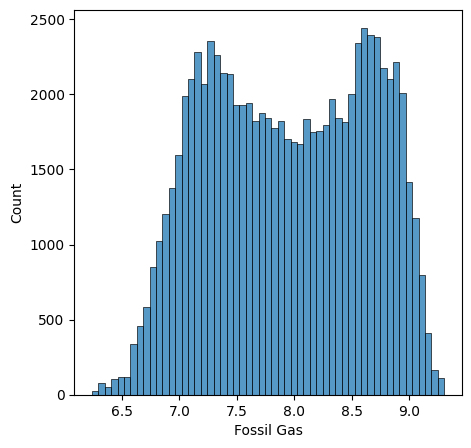

KeyError: 'Fossil Gas'

In [38]:
# lets look at the histogram of the fossil gas column
# plot the histogram of the fossil gas column
plt.figure(figsize=(5, 5))
sns.histplot(data=z_fossil_gas_compiled["Fossil Gas"])
plt.show()


# lets look at the histogram of the fossil gas column without the outliers
# save the maen and quartiles into variables



# create a function to plot the histogram of the other features with the mean and quartiles and saved to histograms folder

def plot_histogram(file, column):
    # convert the file into a dataframe
    file = pd.read_csv("Data/z/" + file)

    # save the maen and quartiles into variables
    mean = file[column].mean()
    q1 = file[column].quantile(0.25)
    q3 = file[column].quantile(0.75)

    # plot the histogram and add the mean and quartiles
    plt.figure(figsize=(5, 5))
    sns.histplot(data=file[column]).axvline(mean, color='r', linestyle='--') # add the mean
    sns.histplot(data=file[column]).axvline(q1, color='b', linestyle='--') # add the 1st quartile
    sns.histplot(data=file[column]).axvline(q3, color='b', linestyle='--') # add the 3rd quartile
    # add the legend
    plt.legend({'Mean':mean,'1st Quartile':q1,'3rd Quartile':q3})
    # save the plot
    plt.savefig("Data/histograms/" + file + "_Histogram.png")
    plt.show()



for file, feature in zip(z_files, features):
    plot_histogram(file, feature)




In [17]:
# after checking the outliers in the fossil gas column, 
# we can see that the outliers are valid data points that do not interfere with the data
# we will keep the outliers in the fossil gas column

# lets investigate if we can change this distribution into a normal distribution
# we can use the log transformation to change the distribution of the data
# we can then check if the data is normally
# distributed by using the shapiro-wilk test




C:\Users\mrkel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


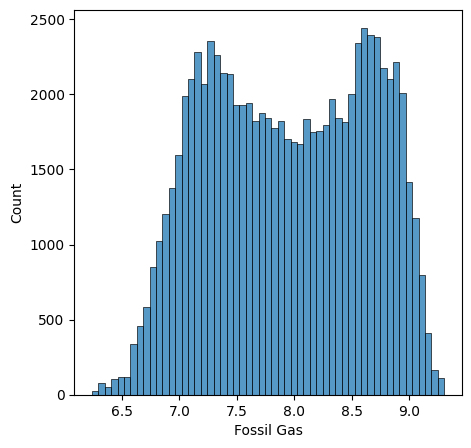

In [18]:
# log transformation of the fossil gas column
log_fossil_gas = z_fossil_gas_compiled["Fossil Gas"] = np.log(z_fossil_gas_compiled["Fossil Gas"])

# save the log_fossil_gas to a csv
log_fossil_gas.to_csv("Data/log/log_fossil_gas.csv", index=False)

# plot the histogram of the log transformed fossil gas column
plt.figure(figsize=(5, 5))
sns.histplot(data=log_fossil_gas)
plt.show()



In [19]:
# after log transformation, the data is still not normally distributed
# the data is double peaked and not normally distributed

# how to transform the data into a normal distribution
# we can use the box-cox transformation
# the box-cox transformation is a family of power transformations
# that can be used to normalize the data
# the box-cox transformation is defined as:
# y = (x^lambda - 1)/lambda
# where x is the data and lambda is the transformation parameter
# lambda is the transformation parameter that maximizes the normality of the data
# the box-cox transformation is only valid for positive data
# we can add a constant to the data to make it positive
# we can then use the box-cox transformation to normalize the data
